## Objective:
### Analysing the Titanic dataset to obtain inferences or insights.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## A. Importing and checking dataset

In [3]:
# Importing Dataset
data_train =  pd.read_csv('./data/train.csv')
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# checking for null values
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### So, there are some entries missing for Age, Cabin and Embarked.

---

## B. Features Visualization
### B1. Gender and Survived

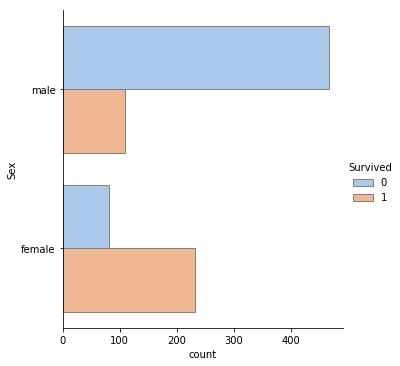

In [7]:
# distribution of female and male survived
ax = sns.catplot(y='Sex', hue='Survived', kind="count", palette="pastel", edgecolor=".5", data=data_train);

In [8]:
print('Tatal Passengers')
data_train['Sex'].value_counts()

Tatal Passengers


male      577
female    314
Name: Sex, dtype: int64

In [9]:
print('Survived Passengers')
surv = data_train.loc[(data_train['Survived'] == 1),'Sex']
surv.value_counts()

Survived Passengers


female    233
male      109
Name: Sex, dtype: int64

### Observation:
**Chances of survival**
* 38% of passengers survived
* 19% of male survived
* 74% of female survived 

**Clearly female passengers are more likely  to survive.**

### B2. Pclass and Survived

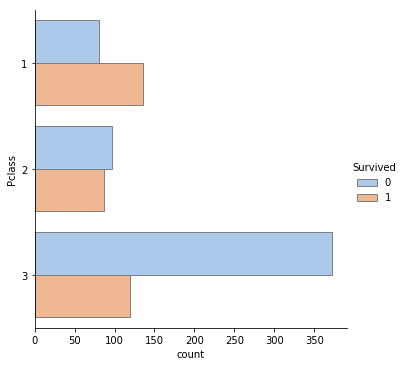

In [10]:
ax = sns.catplot(y='Pclass', hue='Survived', kind="count", palette="pastel", edgecolor=".5", data=data_train)

In [11]:
print('Tatal Passengers')
data_train['Pclass'].value_counts()

Tatal Passengers


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
print('Survived Passengers')
surv = data_train.loc[(data_train['Survived'] == 1),'Pclass']
surv.value_counts()

Survived Passengers


1    136
3    119
2     87
Name: Pclass, dtype: int64

### Obervation
**Chances of survival for Pclass:**
* 1: 0.62
* 2: 0.47
* 3: 0.24

**Here we can conclude, the chance of survival of Passengers:**
**1 <sub>PClass</sub>  >  2<sub>Pclass</sub>  > 3 <sub>Pclass</sub>**

### B3. Age and Survived

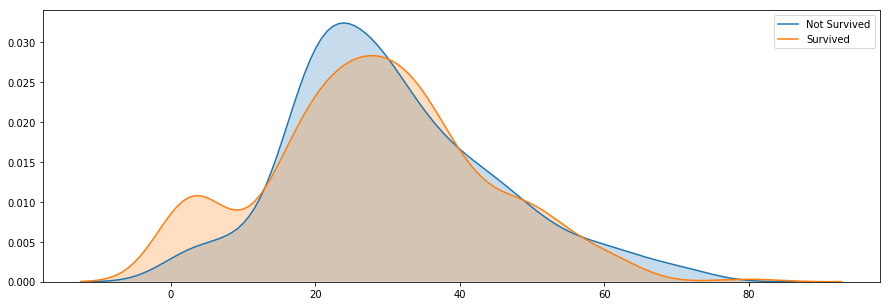

In [15]:
# since some of the age data is missing we have to filter the data
age = data_train[['Age','Survived']].copy().dropna(axis=0)
age_surv_0 = age.loc[(data_train['Survived'] == 0),'Age']
age_surv_1 = age.loc[(data_train['Survived'] == 1),'Age']

plt.figure(figsize=(15, 5))
sns.kdeplot(age_surv_0, shade=True, label='Not Survived');
sns.kdeplot(age_surv_1, shade=True, label='Survived');

In [16]:
print('Passengers survived under the age of 15:-',age_surv_1[(age_surv_1 <= 15)].count())
print('Passengers not survived under the age of 15:-',age_surv_0[(age_surv_0 <= 15)].count())
print('Passengers survived b/w age of 16 and 50:-',age_surv_1[(age_surv_1 > 15 & (age_surv_1<=50))].count())
print('Passengers not survived b/w age of 16 and 50:-',age_surv_0[(age_surv_0 > 15 & (age_surv_0<=50))].count())
print('Passengers survived above the age of 51:-',age_surv_1[(age_surv_1 > 50)].count())
print('Passengers not survived above the age of 51:-',age_surv_0[(age_surv_0 > 50)].count())

Passengers survived under the age of 15:- 49
Passengers not survived under the age of 15:- 34
Passengers survived b/w age of 16 and 50:- 278
Passengers not survived b/w age of 16 and 50:- 422
Passengers survived above the age of 51:- 22
Passengers not survived above the age of 51:- 42


### Ovservation:
*  chances of surviving below age lower than 15 is 59%
*  chances of surviving b/w age of 16 and 50 is 40%
*  chances of surviving above the age of 51 is 34%

**It is clear from the left part of the graph that children have higher chance of surviving than adults.**

### B4. Fare and Survived

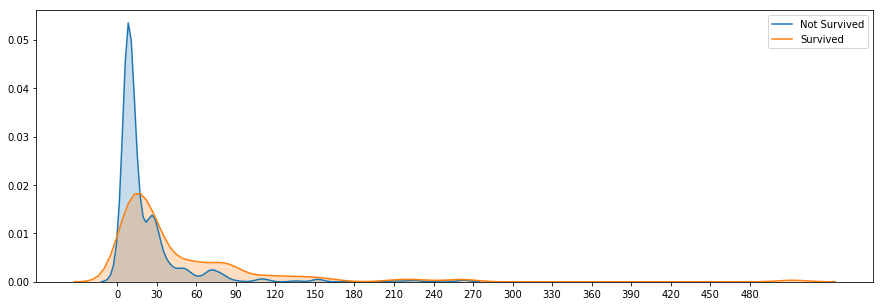

In [20]:
Fare_surv_0 = data_train.loc[(data_train['Survived'] == 0),'Fare']
Fare_surv_1 = data_train.loc[(data_train['Survived'] == 1),'Fare']


plt.figure(figsize=(15, 5))
sns.kdeplot(Fare_surv_0, shade=True, label='Not Survived').set(xticks=range(0,500,30));
sns.kdeplot(Fare_surv_1, shade=True, label='Survived').set(xticks=range(0,500,30));

### Observation:
#### As expected chance of survival with fare less than 30 is less and gradually increases as fare goes higher

### B5. Passengers Embarkment and Survived

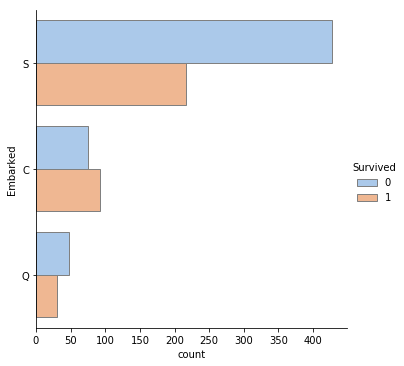

In [21]:
# Since we have 2 empty entries for Embarkment we can to remove them
embared = data_train[['Embarked','Survived']].copy().dropna(axis=0)
ax = sns.catplot(y='Embarked', hue='Survived', kind="count", palette="pastel", edgecolor=".5", data=embared)

In [22]:
print('Tatal Passengers')
data_train['Embarked'].value_counts()

Tatal Passengers


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
print('Survived Passengers')
surv = data_train.loc[(data_train['Survived'] == 1),'Embarked']
surv.value_counts()

Survived Passengers


S    217
C     93
Q     30
Name: Embarked, dtype: int64

### Observation
**(i) Percentage of Passengers survival:**
* S : 34%
* C : 55%
* Q : 38%

**(ii)  Most passengers ( >72%) have embarkment of C**<br>

---

### B6. Distribution: Age-Sex-Survived

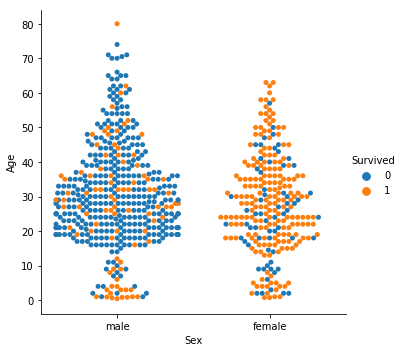

In [27]:
sns.catplot(x="Sex", y="Age", hue="Survived", kind="swarm", data=data_train);

In [29]:
#after looking top left corner
m_o = data_train[(data_train.Sex=='male') & ( data_train.Age >= 60)]
m_o_sur= data_train[(data_train.Sex=='male') & ( data_train.Age >= 60) & (data_train.Survived==1)]

print('male Passengers with age>=60 (total):', m_o['PassengerId'].count())
print('male Passengers with age>=60 (survived):', m_o_sur['PassengerId'].count())

male Passengers with age>=60 (total): 22
male Passengers with age>=60 (survived): 3


In [30]:
m_o_sur

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5,NaN,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2,B41,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


### Observation:
**Very less male passengers with age>=60 survived and its not related to Fare**

### B7. Distribution: Fare-Sex-Survived

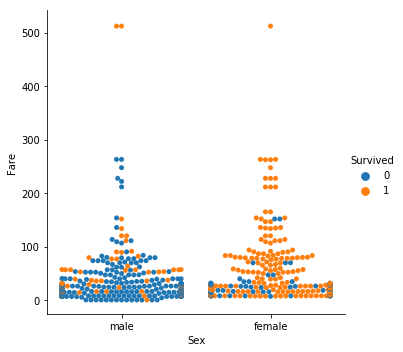

In [31]:
sns.catplot(x="Sex", y="Fare", hue="Survived", kind="swarm", data=data_train);

In [33]:
f_u = data_train[(data_train.Sex=='female') & ( data_train.Fare >= 100)]
f_u_sur = data_train[(data_train.Sex=='female') & (data_train.Survived==1) & ( data_train.Fare >= 100)]

print('female Passengers with upper socio-economic status (Fare>=100)(total):', f_u['PassengerId'].count())
print('female Passengers with upper socio-economic status (Fare>=100)(survived):',f_u_sur['PassengerId'].count())

female Passengers with upper socio-economic status (Fare>=100)(total): 34
female Passengers with upper socio-economic status (Fare>=100)(survived): 32


In [35]:
f_l = data_train[(data_train.Sex=='female') & ( data_train.Fare < 100)]
f_l_sur = data_train[(data_train.Sex=='female')  & (data_train.Survived==1) & ( data_train.Fare < 100)]

print('female Passengers not with upper socio-economic status(Fare<100)(total):',f_l['PassengerId'].count())
print('female Passengers not with upper socio-economic status (Fare<100)(survived):',f_l_sur['PassengerId'].count())

female Passengers not with upper socio-economic status(Fare<100)(total): 280
female Passengers not with upper socio-economic status (Fare<100)(survived): 201


### Observation
**(i) From upper socio-economic status (fare >= 100) allmost all female passengers survived** <br>
**(ii) From the lower socio-economic status (fare < 100) 72% female passengers survived**

### B8.Distribution: Age-Fare-Survived

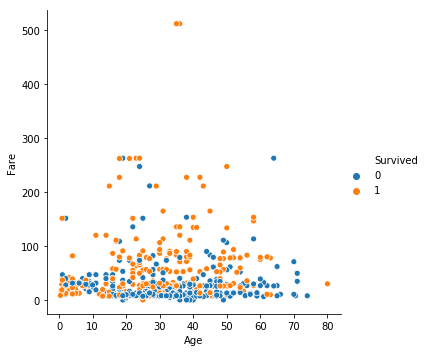

In [36]:
tt = sns.relplot(x="Age", y="Fare", hue="Survived", data=data_train);

In [37]:
child_u = data_train[(data_train.Age<=18) & (data_train.Fare >= 150)]
child_u_s = child_u.loc[(child_u['Survived'] == 1)]

print('children with upper socio-economic(Fare>=100):',child_u['PassengerId'].count())
print('children with upper socio-economic(Fare>=100)(survived):',child_u_s['PassengerId'].count())

children with upper socio-economic(Fare>=100): 5
children with upper socio-economic(Fare>=100)(survived): 4


In [38]:
child_l = data_train[(data_train.Age<=18) & (data_train.Fare < 200)]
child_l_s = child_l.loc[(child_l['Survived'] == 1)]

print('children not from upper socio-economic(Fare>=100):',child_l['PassengerId'].count())
print('children not from upper socio-economic(Fare>=100) (survived)):',child_l_s['PassengerId'].count())

children not from upper socio-economic(Fare>=100): 136
children not from upper socio-economic(Fare>=100) (survived)): 67


### Observation
**chance of survival for a child from upper socio-economic status is 80%** <br>
**where as chance of survival for a child not from upper socio-economic status is 48%**

## Conclusion
1. Female passengers are more likely to survive.
2. Here we can conclude, the chance of survival of Passengers: 1 <sub>PClass</sub>  >  2<sub>Pclass</sub>  > 3<sub>Pclass</sub> .
3. Children have higher chance of surviving than adults.
4. Chance of survival with fare less than 30 is less and gradually increases as fare goes higher.
5. Percentage of Passengers survival having embarkment C is 55%. 
6. Most passengers (>72%) have embarkment of C.
7. Very less male passengers with age>=60 survived and its not related to Fare.
8. From upper socio-economic status (fare >= 100) allmost all female passengers survived.
9. chance of survival for a child from upper socio-economic status is 80%. Where as chance of survival for a child not from upper socio-economic status is 48%.

